In [1]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

#Data Preprocessing
from sklearn import preprocessing

#Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Recommender System Imports
# Content-Based Filtering 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Collaborative Filtering 
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# To work with text data 
import re
import string

foodData = pd.read_csv('Food_Data.csv')

<h1>Content-Based Filtering</h1>

In [3]:
#display from the start
foodData

,Food_ID,Name,C_Type,Veg_Non,Describe
0,1,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin..."
1,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni..."
2,3,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, ..."
3,4,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic ..."
4,5,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest..."
...,...,...,...,...,...
395,396,Kimchi Toast,Korean,veg,"cream cheese, chopped kimchi, scallions,count..."
396,397,"Tacos de Gobernador (Shrimp, Poblano, and Chee...",Mexican,non-veg,"poblano chiles, bacon, shrips, red salsa, garl..."
397,398,Melted Broccoli Pasta With Capers and Anchovies,French,non-veg,"broccoli,Bread Crumbs, anchovy fillets, garli..."
398,399,Lemon-Ginger Cake with Pistachios,Dessert,non-veg,"egg yolks,lemon juice, unsalted butter, all pu..."


In [4]:
foodData.describe()

,Food_ID
count,400.000000
mean,200.500000
std,115.614301
min,1.000000
25%,100.750000
50%,200.500000
75%,300.250000
max,400.000000


In [5]:
#check info of each column
foodData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food_ID   400 non-null    int64 
 1   Name      400 non-null    object
 2   C_Type    400 non-null    object
 3   Veg_Non   400 non-null    object
 4   Describe  400 non-null    object
dtypes: int64(1), object(4)
memory usage: 15.8+ KB


In [6]:
#check null data
foodData.isnull().sum()

Food_ID     0
Name        0
C_Type      0
Veg_Non     0
Describe    0
dtype: int64

In [7]:
#function to separate out the punctuations
def text_cleaning(text):
    text  = "".join([char for char in text if char not in string.punctuation])    
    return text

In [8]:
foodData['Describe'] = foodData['Describe'].apply(text_cleaning)

In [9]:
foodData.head()

,Food_ID,Name,C_Type,Veg_Non,Describe
0,1,summer squash salad,Healthy Food,veg,white balsamic vinegar lemon juice lemon rind ...
1,2,chicken minced salad,Healthy Food,non-veg,olive oil chicken mince garlic minced onion sa...
2,3,sweet chilli almonds,Snack,veg,almonds whole egg white curry leaves salt suga...
3,4,tricolour salad,Healthy Food,veg,vinegar honeysugar soy sauce salt garlic clove...
4,5,christmas cake,Dessert,veg,christmas dry fruits presoaked orange zest lem...


In [10]:
foodData.duplicated().sum()

0

In [11]:
foodData.describe()

,Food_ID
count,400.000000
mean,200.500000
std,115.614301
min,1.000000
25%,100.750000
50%,200.500000
75%,300.250000
max,400.000000


In [12]:
#Concatenate data from different category
def create_mixed_features(table):
    return table['Name'] + " " + table['C_Type'] + " " + table['Veg_Non']

In [13]:
#create a column called MixedFeatures, applying a mixed features of data to each row of the food
foodData['MixedFeatures'] = foodData.apply(create_mixed_features, axis=1)

In [14]:
#New column MixedFeatures has been created as shown in the table with each row of the food having the data
foodData.head()

,Food_ID,Name,C_Type,Veg_Non,Describe,MixedFeatures
0,1,summer squash salad,Healthy Food,veg,white balsamic vinegar lemon juice lemon rind ...,summer squash salad Healthy Food veg
1,2,chicken minced salad,Healthy Food,non-veg,olive oil chicken mince garlic minced onion sa...,chicken minced salad Healthy Food non-veg
2,3,sweet chilli almonds,Snack,veg,almonds whole egg white curry leaves salt suga...,sweet chilli almonds Snack veg
3,4,tricolour salad,Healthy Food,veg,vinegar honeysugar soy sauce salt garlic clove...,tricolour salad Healthy Food veg
4,5,christmas cake,Dessert,veg,christmas dry fruits presoaked orange zest lem...,christmas cake Dessert veg


In [15]:
ratingsData = pd.read_csv('Customer_Ratings.csv')

In [16]:
ratingsData

,User_ID,Food_ID,Rating
0,1,88,4
1,1,46,3
2,1,24,5
3,1,25,4
4,2,49,1
...,...,...,...
507,99,22,1
508,100,24,10
509,100,233,10
510,100,29,7


In [17]:
foodData

,Food_ID,Name,C_Type,Veg_Non,Describe,MixedFeatures
0,1,summer squash salad,Healthy Food,veg,white balsamic vinegar lemon juice lemon rind ...,summer squash salad Healthy Food veg
1,2,chicken minced salad,Healthy Food,non-veg,olive oil chicken mince garlic minced onion sa...,chicken minced salad Healthy Food non-veg
2,3,sweet chilli almonds,Snack,veg,almonds whole egg white curry leaves salt suga...,sweet chilli almonds Snack veg
3,4,tricolour salad,Healthy Food,veg,vinegar honeysugar soy sauce salt garlic clove...,tricolour salad Healthy Food veg
4,5,christmas cake,Dessert,veg,christmas dry fruits presoaked orange zest lem...,christmas cake Dessert veg
...,...,...,...,...,...,...
395,396,Kimchi Toast,Korean,veg,cream cheese chopped kimchi scallionscountrys...,Kimchi Toast Korean veg
396,397,"Tacos de Gobernador (Shrimp, Poblano, and Chee...",Mexican,non-veg,poblano chiles bacon shrips red salsa garlic c...,"Tacos de Gobernador (Shrimp, Poblano, and Chee..."
397,398,Melted Broccoli Pasta With Capers and Anchovies,French,non-veg,broccoliBread Crumbs anchovy fillets garlic c...,Melted Broccoli Pasta With Capers and Anchovie...
398,399,Lemon-Ginger Cake with Pistachios,Dessert,non-veg,egg yolkslemon juice unsalted butter all purpo...,Lemon-Ginger Cake with Pistachios Dessert non-veg


In [18]:
#check info of each column
ratingsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   User_ID  512 non-null    int64
 1   Food_ID  512 non-null    int64
 2   Rating   512 non-null    int64
dtypes: int64(3)
memory usage: 12.1 KB


In [19]:
#check null data
ratingsData.isnull().sum()

User_ID    0
Food_ID    0
Rating     0
dtype: int64

In [20]:
ratingsData.shape

(512, 3)

In [21]:
#count will be calculated while excluding all the common english words such as "is", "the", "a", etc.
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(foodData['MixedFeatures'])
count_matrix.shape

(400, 597)

In [22]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.6172134 , 0.18257419, ..., 0.14433757, 0.15430335,
        0.5       ],
       [0.6172134 , 1.        , 0.16903085, ..., 0.26726124, 0.28571429,
        0.46291005],
       [0.18257419, 0.16903085, 1.        , ..., 0.15811388, 0.16903085,
        0.18257419],
       ...,
       [0.14433757, 0.26726124, 0.15811388, ..., 1.        , 0.26726124,
        0.14433757],
       [0.15430335, 0.28571429, 0.16903085, ..., 0.26726124, 1.        ,
        0.15430335],
       [0.5       , 0.46291005, 0.18257419, ..., 0.14433757, 0.15430335,
        1.        ]])

In [23]:
#Just considering the Food names from the dataframe, dropping the duplicated occurence
indices = pd.Series(foodData.index, index=foodData['Name']).drop_duplicates()
indices

Name
summer squash salad                                          0
chicken minced salad                                         1
sweet chilli almonds                                         2
tricolour salad                                              3
christmas cake                                               4
                                                          ... 
Kimchi Toast                                               395
Tacos de Gobernador (Shrimp, Poblano, and Cheese Tacos)    396
Melted Broccoli Pasta With Capers and Anchovies            397
Lemon-Ginger Cake with Pistachios                          398
Rosemary Roasted Vegetables                                399
Length: 400, dtype: int64

In [24]:
#Content Based Filtering Recommender Code
def get_content_based_recommendations(title, cosine_sim=cosine_sim):
    
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar food
    sim_scores = sim_scores[1:6]
    
    food_indices = [i[0] for i in sim_scores]

    recommendations = foodData.iloc[food_indices].reset_index(drop=True)

    return recommendations[['Food_ID', 'Name', 'C_Type', 'Veg_Non', 'Describe', 'MixedFeatures']], sim_scores

In [25]:
#Content Based Filtering Recommender Code
def get_content_based_recommendations2(title, cosine_sim=cosine_sim):
    
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar food
    sim_scores = sim_scores[1:6]
    
    food_indices = [i[0] for i in sim_scores]

    recommendations = foodData.iloc[food_indices].reset_index(drop=True)

    return recommendations[['Food_ID', 'Name', 'C_Type', 'Veg_Non', 'Describe', 'MixedFeatures']]

In [26]:
title = 'watermelon and strawberry smoothie'
recommended_content_based_food, sim_scores = get_content_based_recommendations(title)
recommended_content_based_food

,Food_ID,Name,C_Type,Veg_Non,Describe,MixedFeatures
0,35,banana walnut smoothie,Healthy Food,veg,Low Fat Yogurt Banana Walnuts Seeds Facseeds a...,banana walnut smoothie Healthy Food veg
1,36,spicy watermelon soup,Healthy Food,veg,Watermelon gingergarlic paste peppermint chili...,spicy watermelon soup Healthy Food veg
2,284,strawberry quinoa pancakes,Healthy Food,veg,quinoa milk olive oil egg slightly beaten baki...,strawberry quinoa pancakes Healthy Food veg
3,14,"peach, raspberry and nuts smoothie",Healthy Food,veg,fresh raspberries ripe banana almond fresh pea...,"peach, raspberry and nuts smoothie Healthy Foo..."
4,34,mixed berry & banana smoothie,Healthy Food,veg,Frozen mixed berries ripped bananafresh orange...,mixed berry & banana smoothie Healthy Food veg


In [27]:
sim_scores

[(34, 0.6666666666666669),
 (35, 0.6666666666666669),
 (283, 0.6666666666666669),
 (13, 0.6172133998483676),
 (33, 0.6172133998483676)]

In [28]:
ground_truth = {
    'watermelon and strawberry smoothie': [35, 36, 284, 14, 34]
}

ground_truth_items = ground_truth.get(title, [])

In [29]:
def calculate_mae(predicted_items, ground_truth_items):
    # Create binary relevance scores for ground truth (1 = relevant, 0 = irrelevant)
    y_true = [1 if item in ground_truth_items else 0 for item in predicted_items]

    # Create predicted relevance scores (1 = recommended, 0 = not recommended)
    y_pred = [1] * len(predicted_items)  # Since all predicted items are recommended
    
    # Compute MAE based on binary relevance
    mae = mean_absolute_error(y_true, y_pred)
    return mae

In [30]:
predicted_items = get_content_based_recommendations2(title)['Food_ID'].tolist()

mae = calculate_mae(predicted_items, ground_truth_items)
print(f"Mean Absolute Error (MAE) based on binary relevance: {mae:.2f}")

Mean Absolute Error (MAE) based on binary relevance: 0.00


In [31]:
def compute_precision_recall(recommended_food_ids, ground_truth_items):
    # Convert lists to sets for easier computation
    recommended_set = set(recommended_food_ids)
    relevant_set = set(ground_truth_items)
    
    # True positives
    tp = len(recommended_set & relevant_set)
    # False positives
    fp = len(recommended_set - relevant_set)
    # False negatives
    fn = len(relevant_set - recommended_set)
    
    # Precision and recall
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    return precision, recall

In [32]:
precision, recall = compute_precision_recall(predicted_items, ground_truth_items)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 1.00
Recall: 1.00


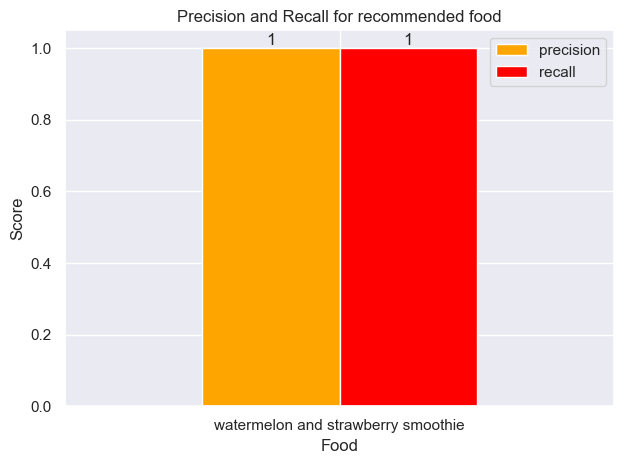

In [33]:
precision_recall_df = pd.DataFrame({
    'precision': [1.0],
    'recall': [1.0]
}, index=['watermelon and strawberry smoothie'])

flg, ax = plt.subplots()
precision_recall_df.plot(kind='bar', ax=ax, color=['orange', 'red'])

ax.set_title('Precision and Recall for recommended food')
ax.set_xlabel('Food')
ax.set_ylabel('Score')

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [34]:
graphCosine = nx.Graph()
graphCosine.add_node(title, label=title)

In [35]:
# Add nodes for each recommended food item and create edges with weights (cosine similarity scores)
for idx, (food_index, score) in enumerate(sim_scores):
    food_name = foodData.iloc[food_index]['Name']
    graphCosine.add_node(food_name, label=food_name)
    # Create an edge between the target food and each similar food item with weight as cosine similarity score
    graphCosine.add_edge(title, food_name, weight=score)

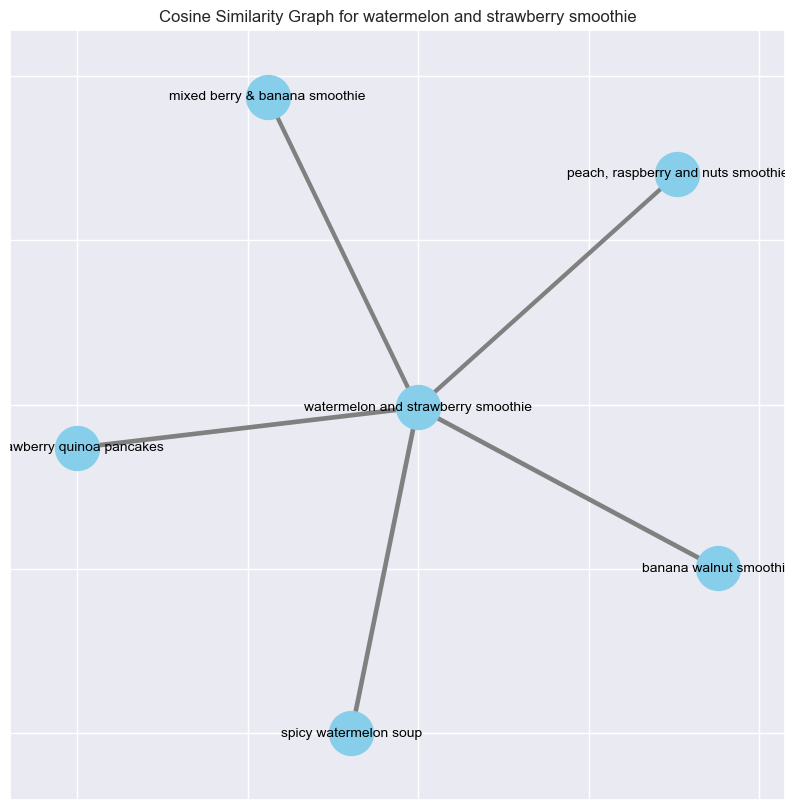

In [36]:
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(graphCosine, seed=42)  # Use spring layout for visualization
edges = graphCosine.edges(data=True)

# Draw nodes and labels
nx.draw_networkx_nodes(graphCosine, pos, node_color='skyblue', node_size=1000)
nx.draw_networkx_labels(graphCosine, pos, font_size=10, font_color='black')

# Draw edges with varying thickness based on similarity score
nx.draw_networkx_edges(graphCosine, pos, edgelist=edges, edge_color='gray',
                       width=[d['weight'] * 5 for (u, v, d) in edges])

plt.title(f"Cosine Similarity Graph for {title}")
plt.show()

<h1>User-Based Collaborative Filtering</h1>

In [38]:
# User-Based Collaborative Filtering
# Making a dataframe that has food ID and the number of ratings
food_rating = ratingsData.groupby(by = 'Food_ID').count()
food_rating = food_rating['Rating'].reset_index().rename(columns={'Rating':'Rating_count'})

food_rating

,Food_ID,Rating_count
0,1,2
1,2,3
2,3,2
3,4,2
4,5,6
...,...,...
304,305,1
305,306,1
306,307,1
307,308,1


In [39]:
# Food rating dataframe description
food_rating['Rating_count'].describe()

count    309.000000
mean       1.656958
std        1.113141
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        7.000000
Name: Rating_count, dtype: float64

In [40]:
# The user rating dataframe shows the number of ratings given with respect to the user
user_rating = ratingsData.groupby(by='User_ID').count()
user_rating = user_rating['Rating'].reset_index().rename(columns={'Rating':'Rating_count'})

user_rating

,User_ID,Rating_count
0,1,4
1,2,4
2,3,9
3,4,6
4,5,6
...,...,...
95,96,6
96,97,7
97,98,7
98,99,6


In [41]:
# User rating dataframe description 
user_rating["Rating_count"].describe()

count    100.000000
mean       5.120000
std        2.345337
min        1.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       11.000000
Name: Rating_count, dtype: float64

In [42]:
#Consider only rows that has ratings more than 6
#filtered_ratings = ratingsData[ratingsData['Rating'] >= 6]
#ratings = ratingsData[ratingsData['Rating']]

# Final Table
rating_matrix = ratingsData.pivot_table(index='Food_ID',columns='User_ID',values='Rating').fillna(0)
rating_matrix.head()

User_ID,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
Food_ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,7.0,0.0,0.0


In [43]:
# Shape of rating_matrix
rating_matrix.shape

(309, 100)

In [44]:
csr_rating_matrix =  csr_matrix(rating_matrix.values)
print(csr_rating_matrix)

  (0, 48)	5.0
  (0, 70)	10.0
  (1, 8)	3.0
  (1, 21)	5.0
  (1, 38)	10.0
  (2, 76)	1.0
  (2, 88)	7.0
  (3, 40)	6.0
  (3, 89)	6.0
  (4, 27)	10.0
  (4, 38)	10.0
  (4, 72)	7.0
  (4, 87)	3.0
  (4, 93)	2.0
  (4, 97)	7.0
  (5, 42)	10.0
  (5, 48)	6.0
  (5, 76)	6.0
  (5, 91)	1.0
  (6, 16)	4.0
  (6, 47)	5.0
  (6, 62)	9.0
  (6, 69)	8.0
  (6, 70)	8.0
  (7, 4)	6.0
  :	:
  (284, 30)	9.0
  (285, 80)	6.0
  (286, 24)	3.0
  (287, 54)	3.0
  (288, 55)	9.0
  (289, 31)	7.0
  (290, 15)	1.0
  (291, 2)	8.0
  (292, 95)	5.0
  (293, 41)	4.0
  (294, 43)	10.0
  (295, 41)	10.0
  (296, 94)	5.0
  (297, 55)	4.0
  (298, 2)	1.0
  (299, 28)	9.0
  (300, 53)	1.0
  (301, 77)	5.0
  (302, 63)	6.0
  (303, 29)	1.0
  (304, 55)	9.0
  (305, 79)	8.0
  (306, 70)	1.0
  (307, 96)	3.0
  (308, 31)	5.0


In [45]:
# Using cosine similarity to find nearest neigbours 
recommender = NearestNeighbors(metric='cosine')
recommender.fit(csr_rating_matrix)

NearestNeighbors(metric='cosine')

In [46]:
# Collaborative Filtering Recommender Code
def get_collaborative_filtering_recommendations(title):
    user= foodData[foodData['Name']==title]
    user_index = np.where(rating_matrix.index==int(user['Food_ID'].iloc[0]))[0][0]
    user_ratings = rating_matrix.iloc[user_index]

    #converts data to 2D array which is necessary for k nearest neighbours
    reshaped = user_ratings.values.reshape(1,-1)
    distances, indices = recommender.kneighbors(reshaped,n_neighbors=5)

    #Retrieves food id values of nearest neighbours excluding the first one which is the selected food
    #nearest_neighbors_indices will contains 15 food item that is nearest
    nearest_neighbors_indices = rating_matrix.iloc[indices[0]].index[0:16]

    #create dataframe called nearest_neighbors containing Food_ID to the nearest neighbors
    nearest_neighbors = pd.DataFrame({'Food_ID': nearest_neighbors_indices})

    #merge the nearest_neighbors with foodData on Food_ID by left join, 
    #only merge rows of foodData with nearest_neighbors that are identical, those are not will be NaN
    result = pd.merge(nearest_neighbors,foodData,on='Food_ID',how='left')
    
    return result.head(5)

In [47]:
# Get recommendations with this function, returning top 5
title = 'amritsari fish'
recommended_food_by_collaborative_filtering = get_collaborative_filtering_recommendations(title)
recommended_food_by_collaborative_filtering

,Food_ID,Name,C_Type,Veg_Non,Describe,MixedFeatures
0,289,amritsari fish,Indian,non-veg,fish with curry ginger and garlic,amritsari fish Indian non-veg
1,305,sunga pork,Japanese,veg,curry,sunga pork Japanese veg
2,298,chicken 65,Chinese,non-veg,ed chicken preparation chicken onion ginger,chicken 65 Chinese non-veg
3,207,spiced almond banana jaggery cake,Dessert,veg,Butter cinnamon molasses powder nutmeg powdere...,spiced almond banana jaggery cake Dessert veg
4,206,chocolate doughnut,Dessert,veg,Sugar egg yolks egg butter yeast milk,chocolate doughnut Dessert veg


In [48]:
collab_ground_truth = {
    'amritsari fish': [289, 305, 298]
}

collab_ground_truth_items = collab_ground_truth.get(title, [])

In [49]:
collab_predicted_items = get_collaborative_filtering_recommendations(title)['Food_ID'].tolist()

mae = calculate_mae(collab_predicted_items, collab_ground_truth_items)
print(f"Mean Absolute Error (MAE) based on binary relevance: {mae:.2f}")

Mean Absolute Error (MAE) based on binary relevance: 0.40


In [50]:
precision, recall = compute_precision_recall(collab_predicted_items, collab_ground_truth_items)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.60
Recall: 1.00


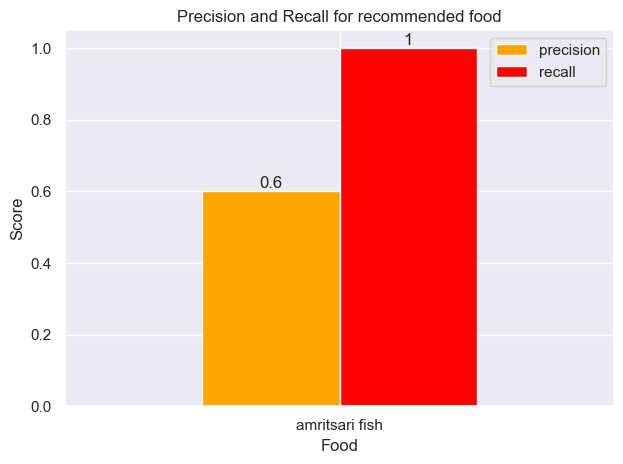

In [51]:
precision_recall_df = pd.DataFrame({
    'precision': [0.6],
    'recall': [1.0]
}, index=['amritsari fish'])

flg, ax = plt.subplots()
precision_recall_df.plot(kind='bar', ax=ax, color=['orange', 'red'])

ax.set_title('Precision and Recall for recommended food')
ax.set_xlabel('Food')
ax.set_ylabel('Score')

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [52]:
graph = nx.Graph()

graph.add_node(title, label=title)

In [53]:
for _, row in recommended_food_by_collaborative_filtering.iterrows():
    food_name = row['Name']
    graph.add_node(food_name, label=food_name)
    # Create an edge between the target food and its recommended food items
    graph.add_edge(title, food_name)

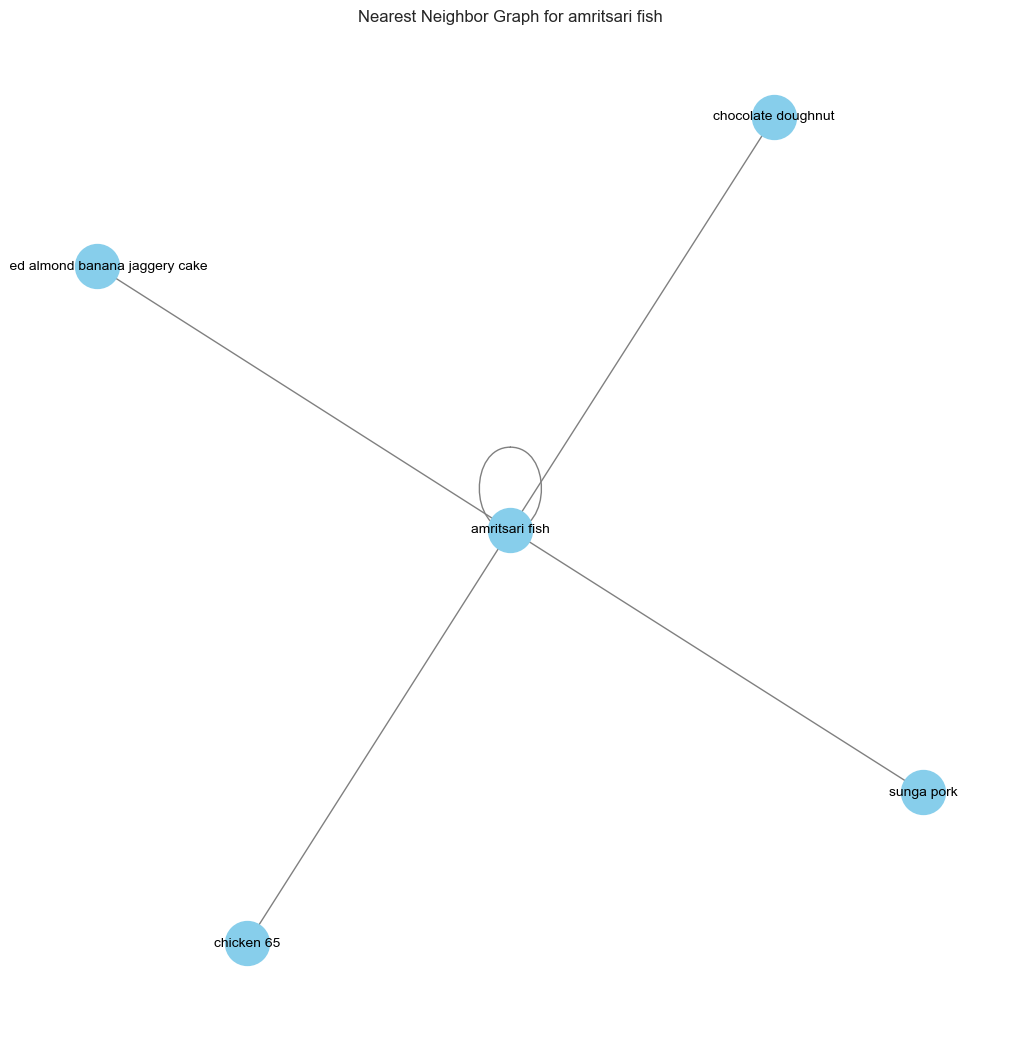

In [54]:
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(graph, seed=42)
nx.draw(graph, pos, with_labels=True, node_color='skyblue', node_size=1000, font_size=10, font_color='black', edge_color='gray')

plt.title(f"Nearest Neighbor Graph for {title}")
plt.show()

Due to the precision and recall of content-based filtering based on the dataset is higher, we will be choosing content-based filtering to deploy it

<h1>Item-Based Collaborative Filtering</h1>

In [57]:
ratingsData2 = ratingsData.copy()

In [58]:
ratingsData2

,User_ID,Food_ID,Rating
0,1,88,4
1,1,46,3
2,1,24,5
3,1,25,4
4,2,49,1
...,...,...,...
507,99,22,1
508,100,24,10
509,100,233,10
510,100,29,7


In [59]:
food_ratingsData = pd.merge(ratingsData2, foodData, on='Food_ID')

In [60]:
food_ratingsData.head()

,User_ID,Food_ID,Rating,Name,C_Type,Veg_Non,Describe,MixedFeatures
0,1,88,4,peri peri chicken satay,Snack,non-veg,boneless skinless chicken thigh trimmed salt a...,peri peri chicken satay Snack non-veg
1,1,46,3,steam bunny chicken bao,Japanese,non-veg,buns all purpose white flour dry yeast sugar s...,steam bunny chicken bao Japanese non-veg
2,1,24,5,green lentil dessert fudge,Dessert,veg,whole moong beans cow ghee raisins whole milk ...,green lentil dessert fudge Dessert veg
3,1,25,4,cashew nut cookies,Dessert,veg,cashew paste ghee khaand a sweetening agent an...,cashew nut cookies Dessert veg
4,2,49,1,christmas tree pizza,Italian,veg,pizza dough 2 boules red pepper red onion basi...,christmas tree pizza Italian veg


In [61]:
food_ratingsData.groupby('Name')['Rating'].mean().head()

Name
active charcoal modak                       7.000000
al hachi chicken                            6.500000
almond  white chocolate gujiya              4.800000
almond and amaranth ladoo                   6.666667
almond and chicken momos (without shell)    6.000000
Name: Rating, dtype: float64

In [62]:
food_ratingsData.groupby('Name')['Rating'].mean().sort_values(ascending=False).head()

Name
grilled lemon margarita         10.0
broccoli souffle                10.0
chicken and mushroom lasagna    10.0
puffed rice squares             10.0
banana and chia tea cake        10.0
Name: Rating, dtype: float64

In [63]:
food_ratingsData.groupby('Name')['Rating'].count().sort_values(ascending=False).head()

Name
red rice vermicelli kheer    7
dates and nuts ladoo         6
christmas cake               6
christmas tree pizza         6
apple rabdi                  5
Name: Rating, dtype: int64

In [64]:
ratings_mean_count = pd.DataFrame(food_ratingsData.groupby('Name')['Rating'].mean())

In [65]:
ratings_mean_count['Rating_count'] = pd.DataFrame(food_ratingsData.groupby('Name')['Rating'].count())

In [66]:
ratings_mean_count.head()

,Rating,Rating_count
Name,,
active charcoal modak,7.000000,2
al hachi chicken,6.500000,2
almond white chocolate gujiya,4.800000,5
almond and amaranth ladoo,6.666667,3
almond and chicken momos (without shell),6.000000,4


<Axes: >

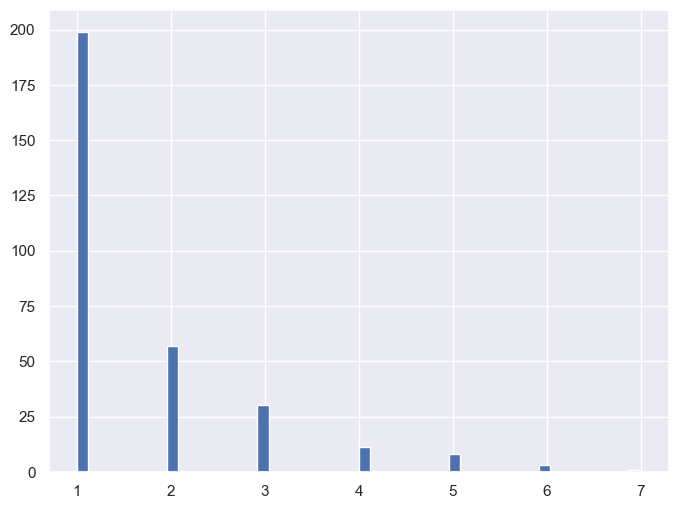

In [67]:
sns.set_style('dark')

#Number of item that has rating of

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Rating_count'].hist(bins=50)

<Axes: >

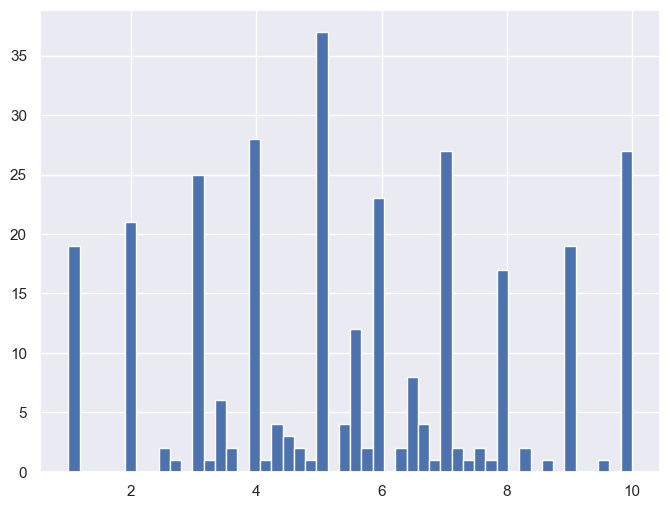

In [68]:
#Average rating of each item
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Rating'].hist(bins=50)

<Figure size 800x600 with 0 Axes>

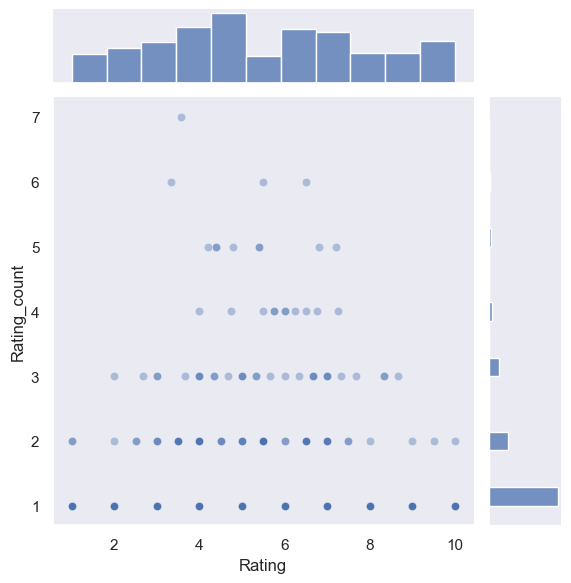

In [69]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Rating', y='Rating_count', data=ratings_mean_count, alpha=0.4)

In [70]:
food_user_ratings = food_ratingsData.pivot_table(index='User_ID', columns='Name', values='Rating')

In [71]:
food_user_ratings.head()

Name,active charcoal modak,al hachi chicken,almond white chocolate gujiya,almond and amaranth ladoo,almond and chicken momos (without shell),almond and cranberry poha,almond and raw banana galawat,almond pearls,"amaranthus granola with lemon yogurt, berries and marigold",amritsari chicken masala,...,vegetable biryani,vegetable bruschetta,vegetable manchurian,vegetable pulao,vegetable som tam salad,watermelon and strawberry smoothie,white chocolate and lemon pastry,whole wheat cake,wok tossed asparagus in mild garlic sauce,zucchini methi pulao
User_ID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
def get_item_based_collaborative_filtering(food):
    proposed_food_ratings = food_user_ratings[food]
    
    food_like_proposed_food = food_user_ratings.corrwith(proposed_food_ratings)
    corr_proposed_food = pd.DataFrame(food_like_proposed_food, columns=['Correlation'])
    corr_proposed_food.dropna(inplace=True)
    
    corr_proposed_food = corr_proposed_food.join(ratings_mean_count['Rating_count'])

    return corr_proposed_food.sort_values('Correlation', ascending=False).head()   

In [195]:
food_corr = 'green lentil dessert fudge'
proposed_food_ratings = food_user_ratings[food_corr]

In [197]:
proposed_food_ratings.head()

User_ID
1    5.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: green lentil dessert fudge, dtype: float64

In [199]:
food_like_proposed_food = food_user_ratings.corrwith(proposed_food_ratings)

corr_proposed_food = pd.DataFrame(food_like_proposed_food, columns=['Correlation'])
corr_proposed_food.dropna(inplace=True)
corr_proposed_food.head()

C:\Users\Admin\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Admin\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\Admin\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


,Correlation
Name,
green lentil dessert fudge,1.0


In [201]:
corr_proposed_food.sort_values('Correlation', ascending=False).head(10)

,Correlation
Name,
green lentil dessert fudge,1.0


In [203]:
corr_proposed_food = corr_proposed_food.join(ratings_mean_count['Rating_count'])
corr_proposed_food.head()

,Correlation,Rating_count
Name,,
green lentil dessert fudge,1.0,3


In [205]:
corr_proposed_food.sort_values('Correlation', ascending=False).head()

,Correlation,Rating_count
Name,,
green lentil dessert fudge,1.0,3


In [207]:
mae = 1 - (1/4)
print(f"Mean Absolute Error (MAE) based on binary relevance: {mae:.2f}")

Mean Absolute Error (MAE) based on binary relevance: 0.75


In [209]:
precision = 1/4
recall = 1/1

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.25
Recall: 1.00


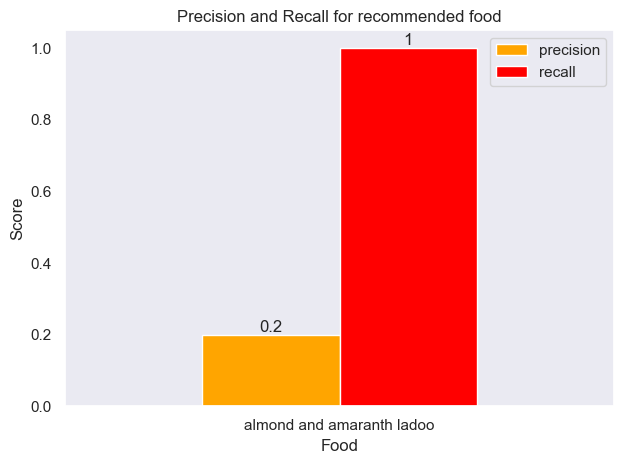

In [187]:
precision_recall_df = pd.DataFrame({
    'precision': [0.2],
    'recall': [1.0]
}, index=['almond and amaranth ladoo'])

flg, ax = plt.subplots()
precision_recall_df.plot(kind='bar', ax=ax, color=['orange', 'red'])

ax.set_title('Precision and Recall for recommended food')
ax.set_xlabel('Food')
ax.set_ylabel('Score')

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<h1>Deployment</h1>

In [83]:
!pip install easygui

In [84]:
#import easygui
import easygui

In [85]:
# load saved dataset
deployment = pd.read_csv('Food_Data.csv')

In [86]:
deployment

,Food_ID,Name,C_Type,Veg_Non,Describe
0,1,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin..."
1,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni..."
2,3,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, ..."
3,4,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic ..."
4,5,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest..."
...,...,...,...,...,...
395,396,Kimchi Toast,Korean,veg,"cream cheese, chopped kimchi, scallions,count..."
396,397,"Tacos de Gobernador (Shrimp, Poblano, and Chee...",Mexican,non-veg,"poblano chiles, bacon, shrips, red salsa, garl..."
397,398,Melted Broccoli Pasta With Capers and Anchovies,French,non-veg,"broccoli,Bread Crumbs, anchovy fillets, garli..."
398,399,Lemon-Ginger Cake with Pistachios,Dessert,non-veg,"egg yolks,lemon juice, unsalted butter, all pu..."


In [87]:
# recommend food based on food entered using the Content-Based Recommendation algorithm, with both the input & output displayed as GUI windows

windowTitle = "Food Recommender"

foodToSearch = easygui.enterbox("Please enter food name below", windowTitle)
output = ''

if (foodToSearch == deployment['Name']).any():
    
    recommendations = get_content_based_recommendations(foodToSearch)
    if recommendations:
        output += f'Recommendations for "{foodToSearch}":\n'
        for i, food in enumerate(recommendations, 1):
            output += f'{i}. {food}\n'
    else:
        output += f'There are no recommendations available for "{foodToSearch}".'
else:
    output += f'There are no recommendations available for "{foodToSearch}".'

easygui.msgbox(output, windowTitle)

'OK'